In [91]:
# Libraries use to do data analysis
# Pandas to load the data and analyze the data.
# Metplot and Seaborn are libraries to visulaize the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# sklearn is the library having implementation of different machine learning algos and supporting methods. 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [37]:
# The very first step is to load the data
adverties = pd.read_csv("advertising.csv")
print("----------------------------")
# Lets see first few rows of the data and identiy columns
print(adverties.head())
print("----------------------------")
# Lets discribe the data, how many, std, min, max, percentiles etc. 
print(adverties.describe())

----------------------------
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
----------------------------
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


Median of TV column is 149.75
Median of Radio column is 22.9
Median of Newspaper column is 25.75


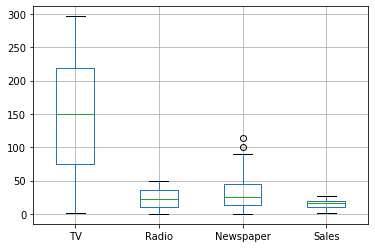

In [60]:
# Lets explore data, how they are distributed using box plot, this will show if data contains outlier or not
# Lets draw box plot
adverties.boxplot()
print("Median of TV column is {}".format(adverties.TV.median()))
print("Median of Radio column is {}".format(adverties.Radio.median()))
print("Median of Newspaper column is {}".format(adverties.Newspaper.median()))

# The box plot shows quartile box with median. The box shows 25-75 percentile,
# while the lower and upper line shows 25 and 100 percentile. Any outlier is show with circles.
# The below data shows that only Newpaper is having two outliers. We can draw distribution to prove that

# Also if you see green line in the mid of the box that means data is not skewed, if you see green line towards bottom means, 
# data is skewed towards left, opposite is towards right.

C:\Users\samehrot\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

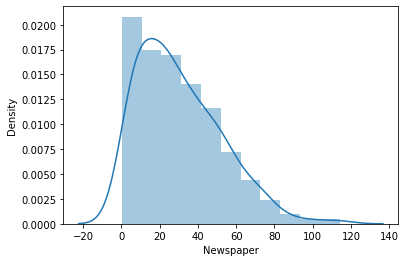

In [61]:
sns.distplot(adverties.Newspaper)
# The below graph is skewed towards left, above box plot also shows that. 

In [92]:
# The values of the data series gives you array of scaller quantites. That means you don't get column, but only rows
# See the shape below, no column
print("Shape of TV Data Series {}".format(adverties.TV.values.shape))

#The below code will not work as, regression object require 2D array, hence we need to reshape it to 2D array
#X = adverties.TV.values
#y = adverties.Sales.values
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#print("Shape of Test Data Series {}".format(X_train.shape))
#lr = LinearRegression()
#prediction = lr.fit(X_train, y_train)

# Reshaping the data
X = adverties.TV.values.reshape(len(adverties.TV.values), 1)
print("Shape of new TV Data Series {}".format(X.shape))
#Observe passing lenght or passing -1 has same effect
y = adverties.Sales.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr = LinearRegression()
print(lr.fit(X_train, y_train))

print("Training Score of lr {}".format(lr.score(X_train, y_train)))
y_pred = lr.predict(X_test)
print("Testing Score of lr {}".format(lr.score(X_test, y_test)))

#Another way for R2 score
print("Testing score by r2_score function {}".format(r2_score(y_test, y_pred)))
# Point to note if score (R2) is near to one for training data but lower for testing data, that means this is a case
# case of overfitting

Shape of TV Data Series (200,)
Shape of new TV Data Series (200, 1)
LinearRegression()
Training Score of lr 0.799626928219267
Testing Score of lr 0.814855389208679
Testing score by r2_score function 0.814855389208679


In [89]:
print("Mean Square Error of LR {} ".format(mean_squared_error(y_test, prediction)))

# Mean square error might come as lower in case you have scalled down the data set, hence you need to infer MSE based on that

Mean Square Error of LR 5.179525402166653 


In [93]:
# lets calculate adjusted R2 score, sklearn doesn't have adjusted r2 score method
def adjusted_r2(r2, labels, features):
    adj_r2_score = 1 - (((1-r2) * len(labels) - 1)) / (len(labels) - features.shape[1])
    return adj_r2_score

In [95]:
print("Adjusted R2 Score {} ".format(adjusted_r2(r2_score(y_test, y_pred), y_test, X_test)))

Adjusted R2 Score 0.8286664975003515 


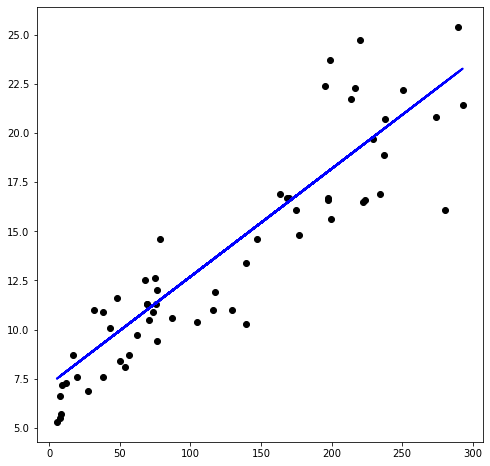

In [100]:
#Now we will see how regression line is fitting on graph
plt.figure(figsize=(8,8))
#Scatter plot, plot data points as dot
plt.scatter(X_test, y_test, c='black')
# Plot draw a line connecting all the points, The line is where prediction came using Liner Regression
plt.plot(X_test, y_pred, c='blue', linewidth=2)

<AxesSubplot:>

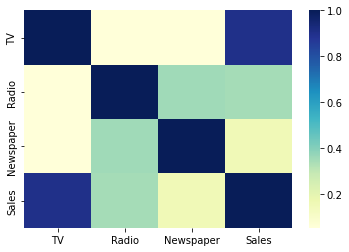

In [107]:
# You can see correlation between features. In the data provided Sales is + and maximum corrlerated with TV ads
sns.heatmap(adverties.corr(), cmap="YlGnBu")